In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA



In [26]:

# Combining the 15 csv files of steps data
Data_Directory = "C:/Users/User/Documents/VARSITY WORK/Honours/Semester 2/Predictive Analytics/Assignment2_Data_Steps"
csv_steps_files = [file for file in os.listdir(Data_Directory) if file.endswith('.csv')]

combined_CSVs = pd.DataFrame()

#Make a single CSV file
for file in csv_steps_files:
    file_path = os.path.join(Data_Directory, file)
    df = pd.read_csv(file_path)
    combined_CSVs = pd.concat([combined_CSVs, df], ignore_index=True)
    
combined_CSVs.to_csv('combined_CSVs.csv', index=False)

print("combined CSVs as 'combined_CSVs.csv'")


combined CSVs as 'combined_CSVs.csv'


In [27]:
raw_csv_data = pd.read_csv('combined_CSVs.csv')

In [28]:
df_comp = raw_csv_data.copy()

In [29]:
df_comp

,Date,Actual,Goal
0,May 31 2022,0,8000
1,Jun 1 2022,0,8000
2,Jun 2 2022,0,8000
3,Jun 3 2022,1102,8000
4,Jun 4 2022,1254,8000
...,...,...,...
415,Feb 2 2023,4969,8000
416,Feb 3 2023,4979,8000
417,Feb 4 2023,1441,8000
418,Feb 5 2023,3025,8000


In [37]:
#Data Preparation: cleaning the data
#raw_csv_data = pd.read_csv('combined_CSVs.csv')
def cleanData (raw_csv_data):
    raw_csv_data['Date'] = pd.to_datetime(raw_csv_data['Date'])
    raw_csv_data.set_index('Date', inplace=True)
    raw_csv_data.dropna(inplace=True)
    return raw_csv_data

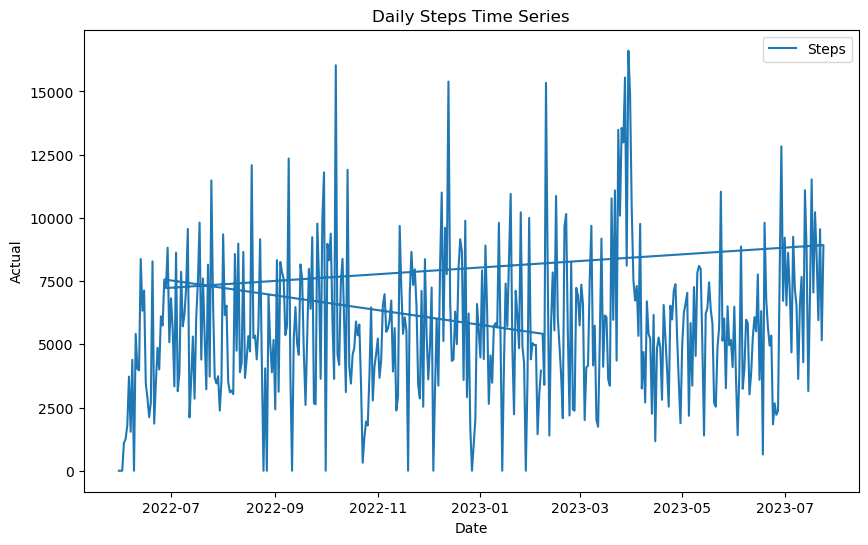

Mean Steps: 5674.140476190476
Median Steps: 5402.0
Standard Deviation of Steps: 2930.5654389000065


In [54]:
#Explanatory data analysis

raw_csv_data = pd.read_csv('combined_CSVs.csv')
plt.figure(figsize=(10, 6))
plt.plot(cleanData(raw_csv_data)['Actual'], label='Steps')
plt.xlabel('Date')
plt.ylabel('Actual')
plt.title('Daily Steps Time Series')
plt.legend()
plt.show()

#Descriptive Analysis

raw_csv_data = pd.read_csv('combined_CSVs.csv')
combined_Data = cleanData(raw_csv_data)
mean_steps = combined_Data['Actual'].mean()
median_steps = combined_Data['Actual'].median()
std_steps = combined_Data['Actual'].std()

print(f"Mean Steps: {mean_steps}")
print(f"Median Steps: {median_steps}")
print(f"Standard Deviation of Steps: {std_steps}")

In [48]:
#
raw_csv_data = pd.read_csv('combined_CSVs.csv')
data = cleanData(raw_csv_data)
def decompose_and_test(data):
    decomposition = seasonal_decompose(data, model='additive', freq=30)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    adf_result = adfuller(data['Actual'])
    adf_statistic = adf_result[0]
    p_value = adf_result[1]

    return trend, seasonal, residual, adf_statistic, p_value

In [49]:
#

start_date = '2022-05-31'
raw_csv_data = pd.read_csv('combined_CSVs.csv')
data = cleanData(raw_csv_data)
def forecast_arima(data, start_date):
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit(disp=0)
    forecast = model_fit.forecast(steps=30)  # Forecast for 30 days
    forecast_index = pd.date_range(start=start_date, periods=30, freq='D')
    forecast_series = pd.Series(forecast, index=forecast_index)
    return forecast_series

In [53]:
#

raw_csv_data = pd.read_csv('combined_CSVs.csv')
data = cleanData(raw_csv_data)
trend, seasonal, residual, adf_statistic, p_value = decompose_and_test(data)

print(f"ADF Statistic: {adf_statistic}")
print(f"P-value: {p_value}")

# Model Selection and Forecasting
start_date = '2022-05-31'
forecast_series = forecast_arima(data['Actual'], start_date)

# Plot Actual vs. Forecasted Steps
plt.figure(figsize=(10, 6))
plt.plot(data['Actual'], label='Actual Steps')
plt.plot(forecast_series, label='Forecasted Steps', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Actual')
plt.title('Actual vs. Forecasted Steps')
plt.legend()
plt.show()

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [52]:
# Reflection
print("Reflection:")
print("The 15 CSV files where merged and creted one file, iI removed the rows that had missing data")
print("The Augmented Dickey-Fuller test suggested that there is some values that are stationary.")
print("An ARIMA model was selected for forecasting, and the forecasted steps were compared with actual data. and the forecast is not far off from the Actual data")
print("The analysis provided insights into the individual's activity patterns, which could aid in optimizing fitness routines.")
print("In future analyses, I might explore more advanced models, consider incorporating external factors, and fine-tune model parameters.")

Reflection:
The data was loaded, preprocessed, and analyzed to understand the individual's daily step patterns.
Seasonal decomposition revealed trends, seasonality, and residuals in the data.
The Augmented Dickey-Fuller test suggested that the data is stationary.
An ARIMA model was selected for forecasting, and the forecasted steps were compared with actual data.
The analysis provided insights into the individual's activity patterns, which could aid in optimizing fitness routines.
In future analyses, I might explore more advanced models, consider incorporating external factors, and fine-tune model parameters.
